In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os 
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd



In [4]:

data_path = os.getcwd() + '/Data/'
output_path = f"{data_path}/clinicaldata_plots/"
date = datetime.now().strftime("%Y%m%d")

# freq = pd.read_csv("freq_table/20240205_freqtable_sorin.csv")
# clinical data
pi = pd.read_excel(f'{data_path}/raw/LUAD Clinical Data.xlsx')

# raw celldata
cd = pd.read_csv(f"{data_path}/celldata/celldata_{date}.csv")
# cd = pd.read_csv('celldata/20240208_cell+patient_info.csv')

# distances
dists = pd.read_csv(f"{data_path}/distances/cell_distances_25px_{date}_allpatients.csv")

# frequencies
freqs = pd.read_csv(f"{data_path}/frequencies/frequencies_25px_{date}.csv")

In [19]:
# Static color cell type pairing for all plots

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']

cts = ['Alt MAC', 'B cell', 'Cancer', 'Cl MAC', 'Cl Mo', 'DCs cell',
       'Endothelial cell', 'Int Mo', 'Mast cell', 'NK cell', 'Neutrophils',
       'Non-Cl Mo', 'T other', 'Tc', 'Th', 'Treg']


In [20]:
count_df = dists.groupby(['ROI_name','source_ID','source_cluster', 'target_cluster']).size().reset_index(name='count')
total_counts_scid = count_df.groupby(['ROI_name','source_ID','source_cluster'])['count'].sum().reset_index(name='total_scid')

total_counts_scid

,ROI_name,source_ID,source_cluster,total_scid
0,LUAD_D001,D001_0,Cancer,15
1,LUAD_D001,D001_1,Tc,12
2,LUAD_D001,D001_10,Th,16
3,LUAD_D001,D001_100,Cancer,12
4,LUAD_D001,D001_1000,Treg,12
...,...,...,...,...
1509794,LUAD_D416,D416_994,B cell,6
1509795,LUAD_D416,D416_996,Cl MAC,8
1509796,LUAD_D416,D416_997,Cancer,5
1509797,LUAD_D416,D416_998,Cl MAC,11


In [16]:
pi.head()

,Key,"Sex (Male: 0, Female: 1)","Age (<75: 0, ≥75: 1)","BMI (<30: 0, ≥30: 1)","Smoking Status (Smoker: 0, Non-smoker:1)","Pack Years (1-30: 0, ≥30: 1)","Stage (I-II: 0, III-IV:1)","Progression (No: 0, Yes: 1)","Death (No: 0, Yes: 1)",Survival or loss to follow-up (years),"Predominant histological pattern (Lepidic:1, Papillary: 2, Acinar: 3, Micropapillary: 4, Solid: 5)"
0,LUAD_D001,0,0,1,0.0,1.0,0.0,0.0,1,8.386,3
1,LUAD_D002,0,0,0,0.0,1.0,0.0,1.0,0,10.111,1
2,LUAD_D003,0,0,0,0.0,1.0,0.0,0.0,1,2.094,5
3,LUAD_D004,0,1,0,0.0,1.0,0.0,0.0,1,1.755,4
4,LUAD_D005,1,0,1,0.0,1.0,0.0,0.0,1,7.598,3


In [13]:
pd.DataFrame(total_counts_scid['source_cluster'].unique())

,0
0,Cancer
1,Tc
2,Th
3,Treg
4,B cell
5,Endothelial cell
6,Non-Cl Mo
7,Cl MAC
8,Int Mo
9,Mast cell


In [26]:
dists

,source_ID,target_ID,distance,source_X,source_Y,target_X,target_Y,source_cluster,target_cluster,ROI_name
0,D063_1,D063_0,26.248809,37,188,45,163,Cancer,Cancer,LUAD_D063
1,D063_2697,D063_0,19.924859,51,182,45,163,Cancer,Cancer,LUAD_D063
2,D063_2709,D063_0,14.035669,46,177,45,163,Cancer,Cancer,LUAD_D063
3,D063_2712,D063_0,17.888544,53,147,45,163,Cancer,Cancer,LUAD_D063
4,D063_31,D063_0,20.396078,65,159,45,163,Cancer,Cancer,LUAD_D063
...,...,...,...,...,...,...,...,...,...,...
33327319,D328_3498,D328_999,21.840330,620,951,614,972,Th,NaN,LUAD_D328
33327320,D328_3507,D328_999,20.615528,630,959,614,972,Cl Mo,NaN,LUAD_D328
33327321,D328_3521,D328_999,34.058773,648,970,614,972,Cl MAC,NaN,LUAD_D328
33327322,D328_737,D328_999,33.241540,582,963,614,972,Th,NaN,LUAD_D328


In [5]:
# Investigate same celltype bias furtheer #TODO
filtered_rows = count_df[count_df['source_cluster'] == count_df['target_cluster']]
filtered_rows


,ROI_name,source_ID,source_cluster,target_cluster,count
1,LUAD_D001,D001_0,Cancer,Cancer,5
14,LUAD_D001,D001_10,Th,Th,2
15,LUAD_D001,D001_100,Cancer,Cancer,6
24,LUAD_D001,D001_1001,B cell,B cell,1
39,LUAD_D001,D001_1003,Endothelial cell,Endothelial cell,3
...,...,...,...,...,...
6978711,LUAD_D416,D416_991,Th,Th,3
6978717,LUAD_D416,D416_993,Cancer,Cancer,4
6978722,LUAD_D416,D416_996,Cl MAC,Cl MAC,3
6978730,LUAD_D416,D416_998,Cl MAC,Cl MAC,4


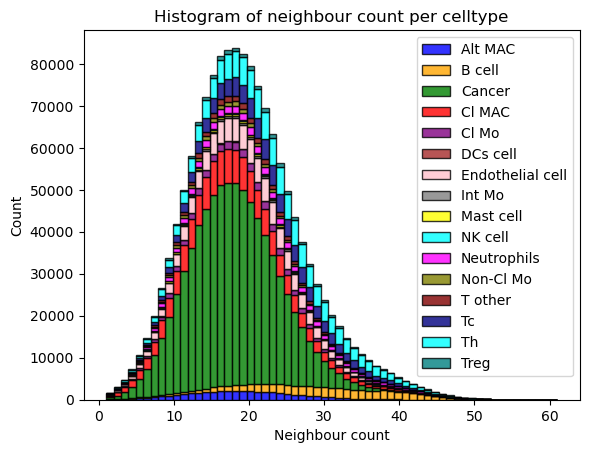

In [8]:
# CT specific histogram
mat = []
for ct in cts:
    tempdf = total_counts_scid[total_counts_scid['source_cluster'] == ct]['total_scid']
    mat.append(tempdf)

labels = cts
plt.hist(mat, 61,
         histtype='bar',
         stacked=True,  
         fill=True,
         label=cts,
         alpha=0.8, # opacity of the bars
         color=colors,
         edgecolor = "k")

plt.xlabel('Neighbour count')
plt.ylabel('Count')
plt.title('Histogram of neighbour count per celltype')
plt.legend()
plt.savefig(f'{output_path}nb_count_histogram_per_ct.png', bbox_inches='tight')

plt.show()

In [10]:
# Cell neighbour count mean
total_counts_scid['total_scid'].mean()

19.480552046994337

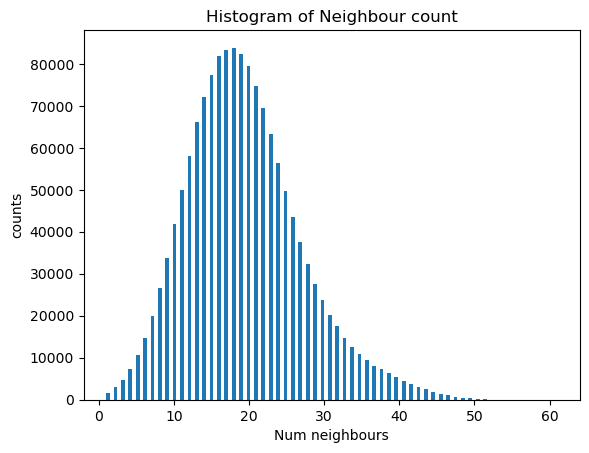

In [9]:
# Aggregated histogram
# 37 for 25px dist
plt.hist(total_counts_scid['total_scid'], bins=61, width=0.5)
plt.xlabel('Num neighbours')
plt.ylabel('counts')
plt.title('Histogram of Neighbour count')
plt.savefig(f'{output_path}nb_count_histogram_agg.png', bbox_inches='tight')

plt.show()

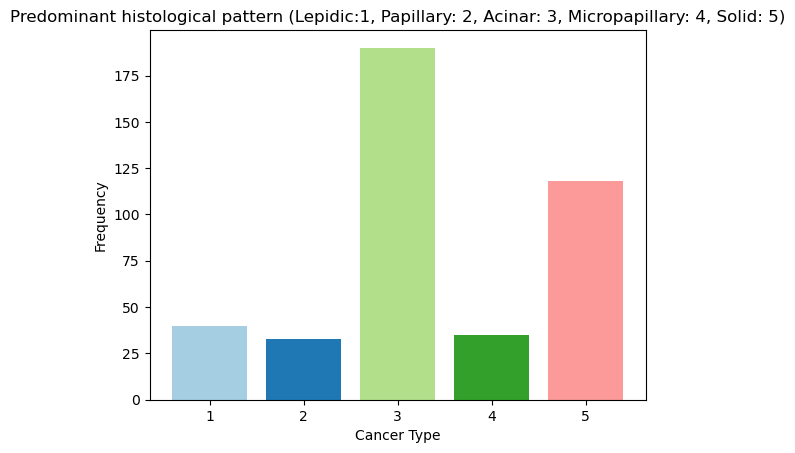

In [9]:
hist_pat = pi['Predominant histological pattern (Lepidic:1, Papillary: 2, Acinar: 3, Micropapillary: 4, Solid: 5)']
type_counts = hist_pat.value_counts().sort_index()

# Plot single bar with different colors for each cancer type
plt.bar(range(len(type_counts)), type_counts, color=plt.cm.Paired(range(len(type_counts))))

plt.xticks(range(len(type_counts)), type_counts.index)
plt.xlabel('Cancer Type')
plt.ylabel('Frequency')
plt.title('Predominant histological pattern (Lepidic:1, Papillary: 2, Acinar: 3, Micropapillary: 4, Solid: 5)')

plt.savefig(f'{output_path}cancertype.png', bbox_inches='tight')

plt.show()

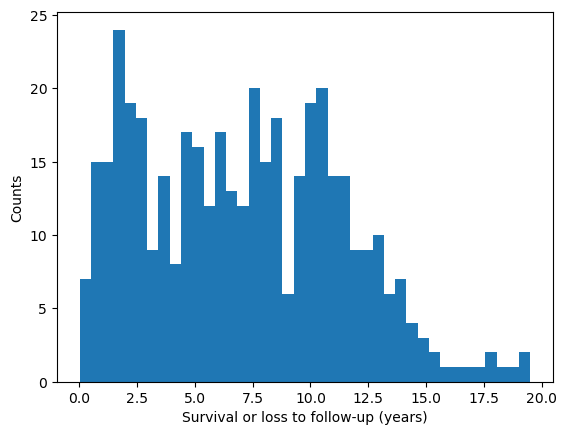

In [10]:
plt.hist(pi['Survival or loss to follow-up (years)'], bins=40)

plt.xlabel('Survival or loss to follow-up (years)')
plt.ylabel('Counts')

plt.savefig(f'{output_path}survival_loss_years.png', bbox_inches='tight')

plt.show()

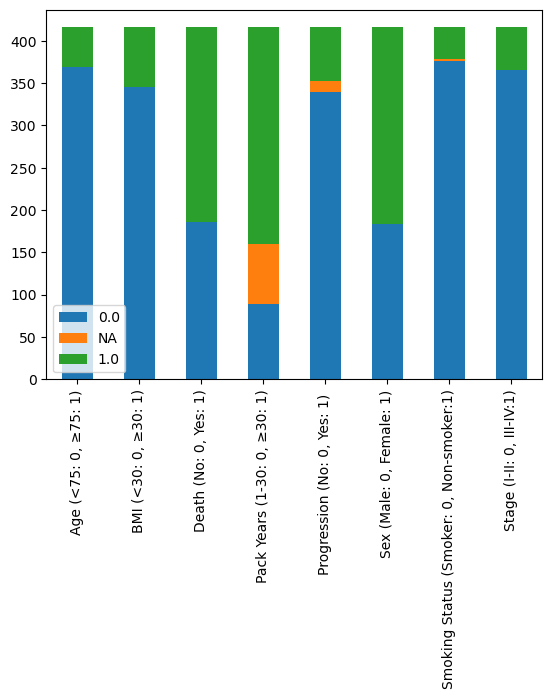

In [11]:
# plot ratios of binary features
bi_pi = pi.iloc[:,1:-2]
bipi2 = bi_pi.stack().groupby(level=[1]).value_counts().unstack()
bipi2['NA'] = 416 - bipi2[list(bipi2.columns)].sum(axis=1)
stack_order = [0,'NA',1]
bipi2 = bipi2[stack_order]
bipi2.plot.bar(rot=90, stacked=True)
plt.savefig(f'{output_path}bicols_ratio.png', bbox_inches='tight')

plt.show()


In [12]:
# Missing segmentation accounts for difference cd and freq
print("Df size for freq and cd respectively:",len(freq), len(cd))
print('Nans in cd:\n',cd.isna().sum())


Df size for freq and cd respectively: 1507024 1640317
Nans in cd:
 x_pix                                                                                                      0
y_pix                                                                                                      0
celltype                                                                                              129599
Key                                                                                                        0
Sex (Male: 0, Female: 1)                                                                                   0
Age (<75: 0, ≥75: 1)                                                                                       0
BMI (<30: 0, ≥30: 1)                                                                                       0
Smoking Status (Smoker: 0, Non-smoker:1)                                                                8117
Pack Years (1-30: 0, ≥30: 1)                                 

In [13]:
permutation_frac = pd.DataFrame(freq['source_cluster'].value_counts()/len(freq))
permutation_frac.rename(columns={'count': 'Random_Permutation'}, inplace=True)
permutation_frac

,Random_Permutation
source_cluster,
Cancer,0.486264
Cl MAC,0.102735
Th,0.098008
Endothelial cell,0.071718
Tc,0.065179
B cell,0.041725
Neutrophils,0.028037
Alt MAC,0.026084
Cl Mo,0.024885


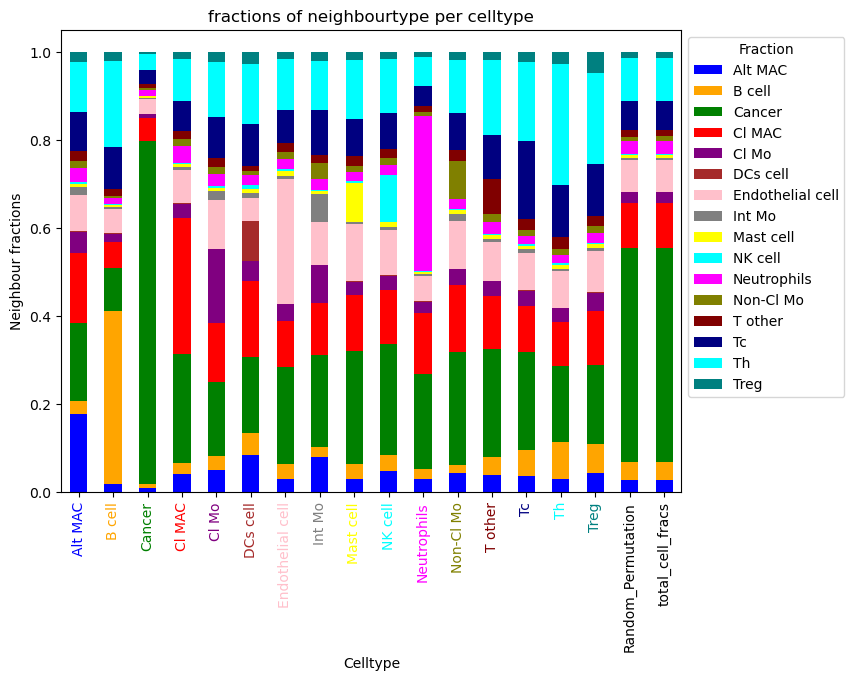

In [21]:
# Create a stacked barplot

allcells = cd['celltype']
clustered = freq.iloc[:,2:].groupby(['source_cluster']).mean()
cts = clustered.columns

# Add optional permutation bar and allcellsfrac bar
permutation_frac = pd.DataFrame(freq['source_cluster'].value_counts()/len(freq))
permutation_frac.rename(columns={'count': 'Random_Permutation'}, inplace=True)
clustered = pd.merge(clustered.T, permutation_frac, left_index=True, right_index=True).T

cellsum = allcells.value_counts().sum()
allcells_frac = pd.DataFrame(allcells.value_counts()/cellsum)
allcells_frac.columns=['total_cell_fracs']
clustered = pd.merge(clustered.T, allcells_frac, left_index=True, right_index=True).T



# ---

ax = clustered.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))
ax.set_xlabel('Celltype')
# Set the color of each x-axis label, edit the index if no perm and frac bars
for i, label in enumerate(ax.get_xticklabels()[:-2]):
    label.set_color(colors[i])


ax.set_ylabel('Neighbour fractions')
ax.set_title('fractions of neighbourtype per celltype')
plt.legend(title='Fraction', bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig(f'{output_path}nb_fracs_sorin.png', bbox_inches='tight')

plt.show()


In [24]:

nbbias_df = clustered
nbbias_df.T

,Alt MAC,B cell,Cancer,Cl MAC,Cl Mo,DCs cell,Endothelial cell,Int Mo,Mast cell,NK cell,Neutrophils,Non-Cl Mo,T other,Tc,Th,Treg,Random_Permutation,total_cell_fracs
Alt MAC,0.178078,0.018050,0.009429,0.040932,0.049457,0.084008,0.029751,0.079092,0.030126,0.047096,0.030069,0.042229,0.037628,0.035242,0.030454,0.043565,0.026084,0.026148
B cell,0.029067,0.394206,0.009279,0.024332,0.031480,0.050420,0.032896,0.023388,0.033670,0.036028,0.021238,0.020184,0.041688,0.060525,0.083438,0.065144,0.041725,0.041663
Cancer,0.177249,0.097257,0.778646,0.249280,0.169586,0.172997,0.220616,0.208847,0.257518,0.254088,0.216797,0.254780,0.245788,0.222144,0.171867,0.179493,0.486264,0.485712
Cl MAC,0.159792,0.059337,0.052341,0.307900,0.133959,0.171100,0.106251,0.118217,0.125555,0.121232,0.139540,0.153541,0.119847,0.104685,0.100327,0.122308,0.102735,0.103181
Cl Mo,0.046305,0.018390,0.008923,0.032205,0.166944,0.045801,0.037966,0.085530,0.031154,0.031613,0.024902,0.035919,0.033821,0.034740,0.031383,0.041026,0.024885,0.024924
DCs cell,0.002911,0.001111,0.000341,0.001546,0.001700,0.092478,0.000660,0.001730,0.001611,0.003571,0.000653,0.000955,0.000689,0.001352,0.001285,0.001940,0.000933,0.000931
Endothelial cell,0.082503,0.055871,0.034228,0.074986,0.111000,0.051532,0.283708,0.096205,0.129261,0.101035,0.057109,0.107156,0.089139,0.084339,0.082931,0.093137,0.071718,0.071745
Int Mo,0.016484,0.003065,0.002440,0.006311,0.019163,0.010411,0.007380,0.064285,0.005189,0.007215,0.004879,0.018070,0.006516,0.008485,0.006201,0.008329,0.005516,0.005514
Mast cell,0.007093,0.004985,0.003394,0.007665,0.008030,0.010481,0.011287,0.005815,0.087080,0.011851,0.004786,0.007924,0.008648,0.007949,0.008534,0.008652,0.006251,0.006275
NK cell,0.004278,0.002084,0.001280,0.002821,0.003141,0.009274,0.003390,0.003343,0.004820,0.106066,0.001986,0.003350,0.003088,0.003071,0.002962,0.003123,0.002421,0.002450
